<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/BinaryTextClassificationWithTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [257]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [258]:
np.random.seed(0)
tf.random.set_seed(0)

In [259]:
df = pd.read_csv('AirlineTweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [260]:
df = df[['airline_sentiment', 'text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

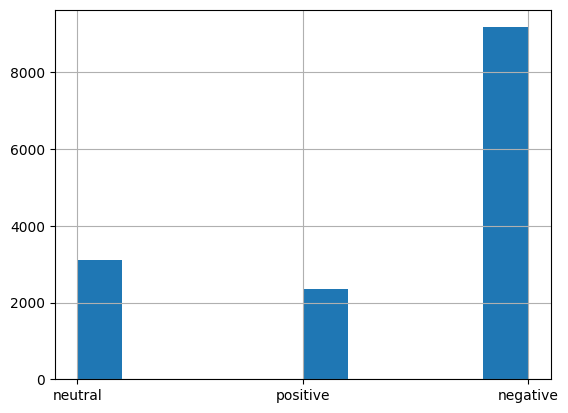

In [261]:
df['airline_sentiment'].hist()

In [262]:
# we solve binary classification so we take only 2
df = df[df['airline_sentiment'] != 'neutral'].copy()
df.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


<Axes: >

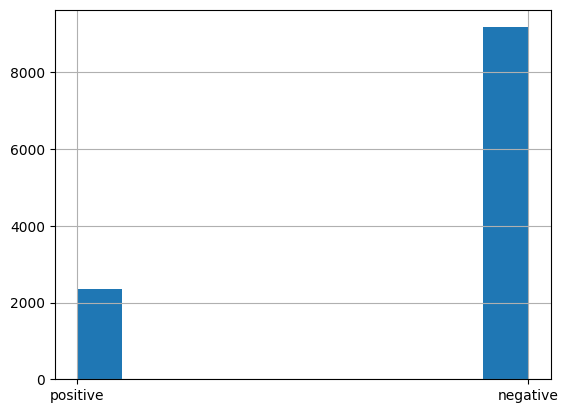

In [263]:
df['airline_sentiment'].hist()

In [264]:
target_map = {'positive': 1, 'negative': 0}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [265]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

In [266]:
# format tha data
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [267]:
# input dimensions
D = X_train.shape[1]
print('Input dimension', D)

Input dimension 2000


In [268]:
# initialize loss function and optimizer
loss_fn = BinaryCrossentropy(from_logits=True)
optimizer = Adam(learning_rate=0.01)

In [269]:
# initialize model
model = Model()

In [270]:
# define input layer
i = Input(shape=(D,))
x = Dense(1)(i) # activation='sigmoid' included in the loss function
model = Model(i, x)

In [271]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │           2,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

In [272]:
model.compile(
    loss = loss_fn,
    optimizer = optimizer,
    metrics = ['accuracy']
)

In [273]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12, batch_size = 32)

Epoch 1/12
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7914 - loss: 0.5121 - val_accuracy: 0.8229 - val_loss: 0.3297
Epoch 2/12
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8263 - loss: 0.3102 - val_accuracy: 0.8675 - val_loss: 0.2702
Epoch 3/12
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8684 - loss: 0.2479 - val_accuracy: 0.8891 - val_loss: 0.2427
Epoch 4/12
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8973 - loss: 0.2142 - val_accuracy: 0.8995 - val_loss: 0.2279
Epoch 5/12
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9113 - loss: 0.1925 - val_accuracy: 0.9026 - val_loss: 0.2194
Epoch 6/12
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9205 - loss: 0.1771 - val_accuracy: 0.9069 - val_loss: 0.2145
Epoch 7/12
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9263 - loss: 0.1654 - val_accuracy: 0.9095 - val_loss: 0.2118
Epoch 8/12
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9295 - loss: 0.1562 - val_accuracy: 0.

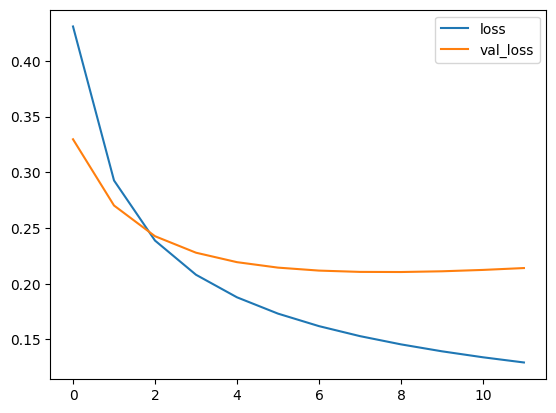

In [274]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

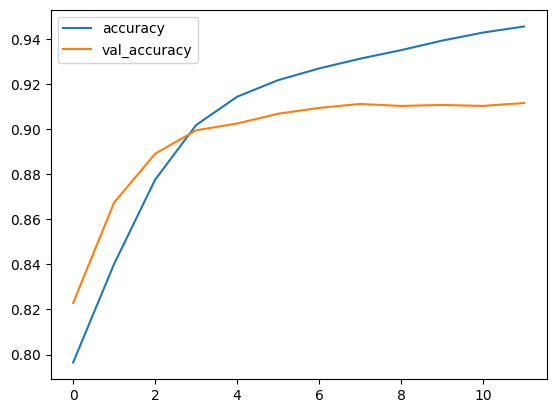

In [275]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [276]:
P_train = ((model.predict(X_train) > 0) * 1.0).flatten()
P_test = ((model.predict(X_test) > 0) * 1.0).flatten()

289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [277]:
cm = confusion_matrix(y_train, P_train, normalize='true')
cm

array([[0.98605796, 0.01394204],
       [0.1440501 , 0.8559499 ]])

In [278]:
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues')
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

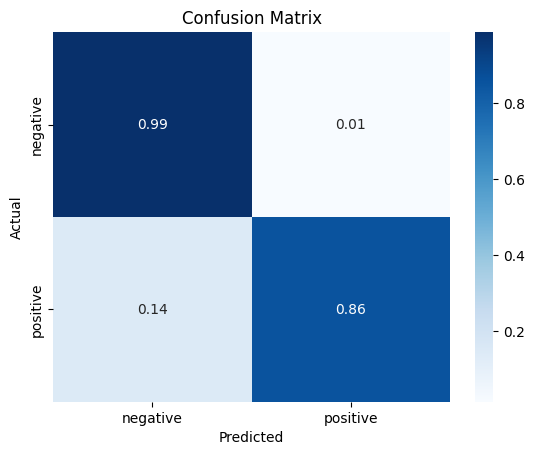

In [279]:
plot_cm(cm)

In [280]:
cm_test = confusion_matrix(y_test, P_test, normalize='true')
cm_test

array([[0.96831364, 0.03168636],
       [0.2885906 , 0.7114094 ]])

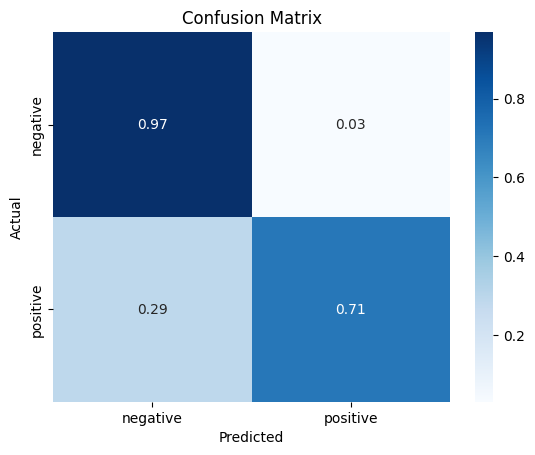

In [281]:
plot_cm(cm_test)

In [282]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print('Train AUC', roc_auc_score(y_train, Pr_train))
print('Test AUC', roc_auc_score(y_test, Pr_test))

289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train AUC 0.9894783333009927
Test AUC 0.9449276354837236


In [283]:
print('Train F1', f1_score(y_train, P_train))
print('Test F1', f1_score(y_test, P_test))

Train F1 0.896664844177146
Test F1 0.7718446601941747


In [284]:
model.layers

[<InputLayer name=input_layer_12, built=True>,
 <Dense name=dense_11, built=True>]

In [285]:
model.layers[1].get_weights()

[array([[-2.7232327 ],
        [ 1.7316836 ],
        [-0.944935  ],
        ...,
        [ 1.0032526 ],
        [-2.367225  ],
        [ 0.29399303]], dtype=float32),
 array([-0.8667347], dtype=float32)]

In [286]:
w = model.layers[1].get_weights()[0]

In [287]:
word_index_map = vectorizer.vocabulary_

In [288]:
# let's look at the weights for each words
threshold = 2

print("Most positive words:")
word_weight_tuples = []
for word, index in word_index_map.items():
  weight = w[index, 0]
  if weight > threshold:
    word_weight_tuples.append((word, weight))
word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])
for word, weight in word_weight_tuples[:10]:
  print(f'{word}: {weight}')

Most positive words:
thank: 9.294328689575195
thanks: 8.55319595336914
awesome: 6.480129718780518
great: 6.199151992797852
love: 5.730249404907227
worries: 5.551239967346191
kudos: 5.504446983337402
excellent: 5.477497577667236
amazing: 5.44846248626709
best: 4.899805068969727


In [289]:
print("Most negative words:")
word_weight_tuples = []
for word, index in word_index_map.items():
  weight = w[index, 0]
  if weight < -threshold:
    word_weight_tuples.append((word, weight))


word_weight_tuples = sorted(word_weight_tuples, key=lambda x: x[1])
for word, weight in word_weight_tuples[:10]:
  print(f'{word}: {weight}')

Most negative words:
worst: -8.259428024291992
rude: -6.415970802307129
paid: -6.2918219566345215
hold: -6.054779529571533
disappointed: -5.941002368927002
online: -5.656639575958252
fail: -5.58819055557251
delayed: -5.396597862243652
hung: -5.313772678375244
hours: -5.269983768463135
